# Données

In [53]:
from numpy import *
from matplotlib.pyplot import *
from scipy.linalg import inv
from sklearn.decomposition import PCA

from tools import poly_exp, MSE

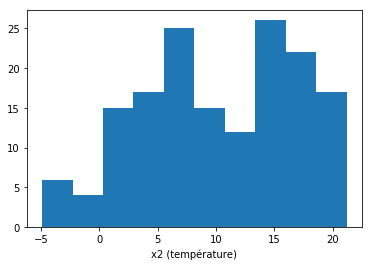

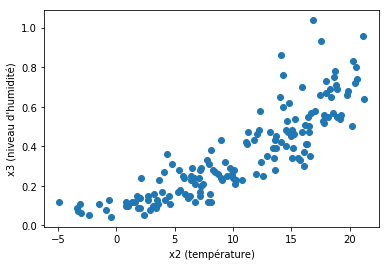

In [2]:
# Load the data

data = loadtxt('data/data_train.csv', delimiter=',')

# Prepare the data

X = data[:, 0:-1] # Toutes les lignes, puis les colonnes entre [0,-1[, où -1 signifie la dernière colonne
y = data[:, -1]

# Inspect the data

figure()
hist(X[:,1], 10)
xlabel('x2 (température)')
show()

figure()
plot(X[:,1],X[:,2], 'o')
xlabel('x2 (température)')
ylabel('x3 (niveau d\'humidité)')
show()

# TASK 1

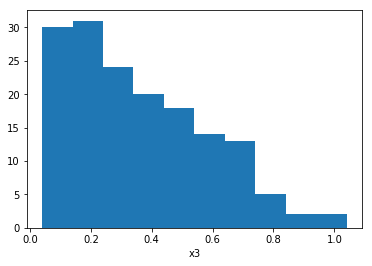

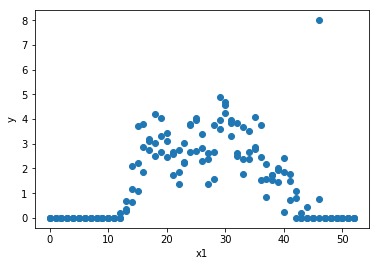

In [3]:
figure()
hist(X[:,2], 10)
xlabel('x3')
show()

figure()
plot(X[:,0], y, 'o')
xlabel('x1')
ylabel('y')
show()

# TASK 2

In [4]:
# Standardization

res = []
m_X = []
s_X = []

for i in range(0,3):
    m_X.append(mean(X[:,i],axis=0)) # Moyenne en colonne (axis = 0)
    s_X.append(std(X[:,i],axis=0)) # Écart type en colone (axis = 0)
    res.append((X[:,i] - m_X[i])/s_X[i])

X = column_stack(res)

# TASK 3

In [5]:
# Feature creation

Z = poly_exp(X,2)
Z = column_stack([ones(len(Z)), Z]) # Z = [1, X1, X2, X3, X1^2, X2^2, X3^2]
Zt = transpose(Z)

# Building a model

# Evaluation 

w = dot(dot(linalg.inv(dot(Zt,Z)),Zt),y) # || Y - Xβ || : β est le vecteur qui minimise la distance (regression linéaire)
print(w)

[ 1.90241744  0.11717127  0.69105316  0.03082837 -0.67639436  0.23993777
  0.03064292]


# TASK 4

In [6]:
data_test = loadtxt('data/data_test.csv', delimiter=',')

# Prepare the data

X_test = data_test[:, 0:-1] # Toutes les lignes, puis les colonnes entre [0,-1[, où -1 signifie la dernière colonne
y_test = data_test[:, -1]

res_test = []

for i in range(0,3):
    res_test.append((X_test[:,i] - m_X[i])/s_X[i]) # We don't recompute mean and std

X_test = column_stack(res_test)

Z_test = poly_exp(X_test,2)
Z_test = column_stack([ones(len(Z_test)), Z_test])

# TASK 5

In [7]:
y_pred = dot(Z_test, w)

mse_test = MSE(y_test, y_pred)
print(mse_test)

0.5461913315483578


# TASK 6

In [8]:
mse_baseline = MSE(y_test, ones(len(y_test))*mean(y))
print(mse_baseline)

1.7691746529013888


# TASK 7

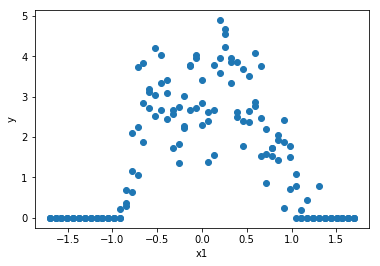

0.5098814630062213


In [9]:
outlier_index = where(y>7)
y[outlier_index] = 0

figure()
plot(X[:,0], y, 'o')
xlabel('x1')
ylabel('y')
show()

w_corrected = dot(dot(linalg.inv(dot(Zt,Z)),Zt),y)
y_pred_corrected = dot(Z_test, w_corrected)
mse_test_corrected = MSE(y_test, y_pred_corrected)
print(mse_test_corrected)

# TASK 8

In [50]:
def compute_mse(degree, link_to_data, train):
    
    data = loadtxt('data/data_train.csv', delimiter=',')
    X = data[:, 0:-1]
    y = data[:, -1]

    outlier_index = where(y>7)
    y[outlier_index] = 0
    
    data_test = loadtxt(link_to_data, delimiter=',')
    X_test = data_test[:, 0:-1]
    y_test = data_test[:, -1]

    Z = poly_exp(X,degree)
    Z = column_stack([ones(len(Z)), Z])
    Zt = transpose(Z)
    w = dot(dot(linalg.inv(dot(Zt,Z)),Zt),y)
    
    Z_test = poly_exp(X_test,degree)
    Z_test = column_stack([ones(len(Z_test)), Z_test])
    y_pred = dot(Z_test, w)
    
    y_compare = y if train else y_test

    mse_test = MSE(y_compare, y_pred)

    return mse_test

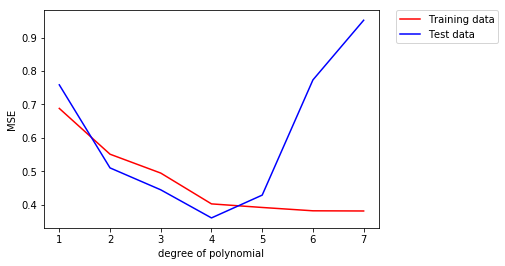

In [51]:
mse_test_list = []
mse_train_list = []
degrees = range(1,8)

for degree in degrees:
    mse_test_list.append(compute_mse(degree, 'data/data_test.csv', False))
    mse_train_list.append(compute_mse(degree, 'data/data_train.csv', True))

figure()
plot(degrees, mse_train_list, 'r', label="Training data")
plot(degrees, mse_test_list, 'b', label="Test data")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("degree of polynomial")
ylabel("MSE")
show()

# TASK 9

In [58]:
def compute_mse_pca(degree, link_to_data, train):
    
    data = loadtxt('data/data_train.csv', delimiter=',')
    X = data[:, 0:-1]
    y = data[:, -1]
    
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

    outlier_index = where(y>7)
    y[outlier_index] = 0
    
    data_test = loadtxt(link_to_data, delimiter=',')
    X_test = pca.transform(data_test[:, 0:-1])
    y_test = data_test[:, -1]

    Z = poly_exp(X,degree)
    Z = column_stack([ones(len(Z)), Z])
    Zt = transpose(Z)
    w = dot(dot(linalg.inv(dot(Zt,Z)),Zt),y)
    
    Z_test = poly_exp(X_test,degree)
    Z_test = column_stack([ones(len(Z_test)), Z_test])
    y_pred = dot(Z_test, w)
    
    y_compare = y if train else y_test

    mse_test = MSE(y_compare, y_pred)

    return mse_test

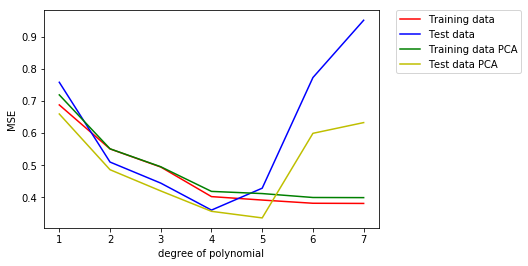

In [60]:
mse_test_list = []
mse_train_list = []
mse_test_list_pca = []
mse_train_list_pca = []
degrees = range(1,8)

for degree in degrees:
    mse_test_list.append(compute_mse(degree, 'data/data_test.csv', False))
    mse_train_list.append(compute_mse(degree, 'data/data_train.csv', True))
    mse_test_list_pca.append(compute_mse_pca(degree, 'data/data_test.csv', False))
    mse_train_list_pca.append(compute_mse_pca(degree, 'data/data_train.csv', True))

figure()
plot(degrees, mse_train_list, 'r', label="Training data")
plot(degrees, mse_test_list, 'b', label="Test data")
plot(degrees, mse_train_list_pca, 'g', label="Training data PCA")
plot(degrees, mse_test_list_pca, 'y', label="Test data PCA")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("degree of polynomial")
ylabel("MSE")
show()